In [50]:
import requests
from bs4 import BeautifulSoup
import matplotlib as plt
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
import psutil
import matplotlib.pyplot as plt
from scipy.stats import norm
from datetime import datetime
import time


In [51]:
%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'
x = []
y = []
price_1 = []
price_2 = []
spread_futures = []

In [52]:
def remove_commas(x,y):
    x = x.replace(",","")
    y = y.replace(",","")
    return x,y

In [53]:
def string_to_float(x,y):
    x = float(x)
    y = float(y)
    return x,y

In [54]:
def get_date_timestamp():
        now = datetime.now()
        now = now.strftime("%d/%m/%Y %H:%M:%S")
        return now

In [55]:


headers = {
    'accept': '*/*',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.64 Safari/537.36 Edg/101.0.1210.53',
    'Accept-Language': 'en-US,en;q=0.9,it;q=0.8,es;q=0.7',
    'referer': 'https://www.google.com/',
    'cookie': 'DSID=AAO-7r4OSkS76zbHUkiOpnI0kk-X19BLDFF53G8gbnd21VZV2iehu-w_2v14cxvRvrkd_NjIdBWX7wUiQ66f-D8kOkTKD1BhLVlqrFAaqDP3LodRK2I0NfrObmhV9HsedGE7-mQeJpwJifSxdchqf524IMh9piBflGqP0Lg0_xjGmLKEQ0F4Na6THgC06VhtUG5infEdqMQ9otlJENe3PmOQTC_UeTH5DnENYwWC8KXs-M4fWmDADmG414V0_X0TfjrYu01nDH2Dcf3TIOFbRDb993g8nOCswLMi92LwjoqhYnFdf1jzgK0'
}
        
        
nq_s1 = "https://finance.yahoo.com/quote/NQ%3DF/?p=NQ%3DF"
es_s2 = "https://finance.yahoo.com/quote/ES%3DF/?p=ES%3DF"

In [56]:
def scrape_yahoo(nq_s1,es_s2):

    for n in range(1000):
        
        
        url1 = nq_s1
        url2 = es_s2
    
        response_nq = requests.get(url1, headers=headers)
        html_nq = response_nq.content

        response_es = requests.get(url2,headers=headers)
        html_es = response_es.content
    
        soup_nq = BeautifulSoup(html_nq, "html.parser")
        soup_es = BeautifulSoup(html_es, "html.parser")
    
        price_nq_orig = soup_nq.find('div', {'class': "D(ib) Mend(20px)"}).text
        price_es_orig = soup_es.find('div', {'class': "D(ib) Mend(20px)"}).text
         
        price_nq = soup_nq.find('fin-streamer', {'class': "Fw(b) Fz(36px) Mb(-4px) D(ib)"}).text
        price_es = soup_es.find('fin-streamer', {'class': "Fw(b) Fz(36px) Mb(-4px) D(ib)"}).text
        
        
        price_no_commas = remove_commas(price_nq,price_es)
        
        
        price_to_float = string_to_float(price_no_commas[0],price_no_commas[1])
        
        price_1.append(price_to_float[0])
        price_2.append(price_to_float[1])  
        
        price1 = pd.DataFrame(price_1, columns = ['price'])
        price2 = pd.DataFrame(price_2, columns= ['price'])
         
        spread = price1['price']-price2['price']
        
        mean_spread = spread.mean()
        std_spread = spread.std()

        z_score = (spread - mean_spread) / std_spread
        
        z_out = z_score.tolist()
        
        print(round(z_out[-1],2),",",get_date_timestamp())
        
                
        x.append(n)
        y.append(z_out[n])
        ax.plot(x,y,color='b')
        fig.canvas.draw()
        ax.set_xlim(left=max(0, n-50), right=n+50)
        
        

        time.sleep(300)

<IPython.core.display.Javascript object>


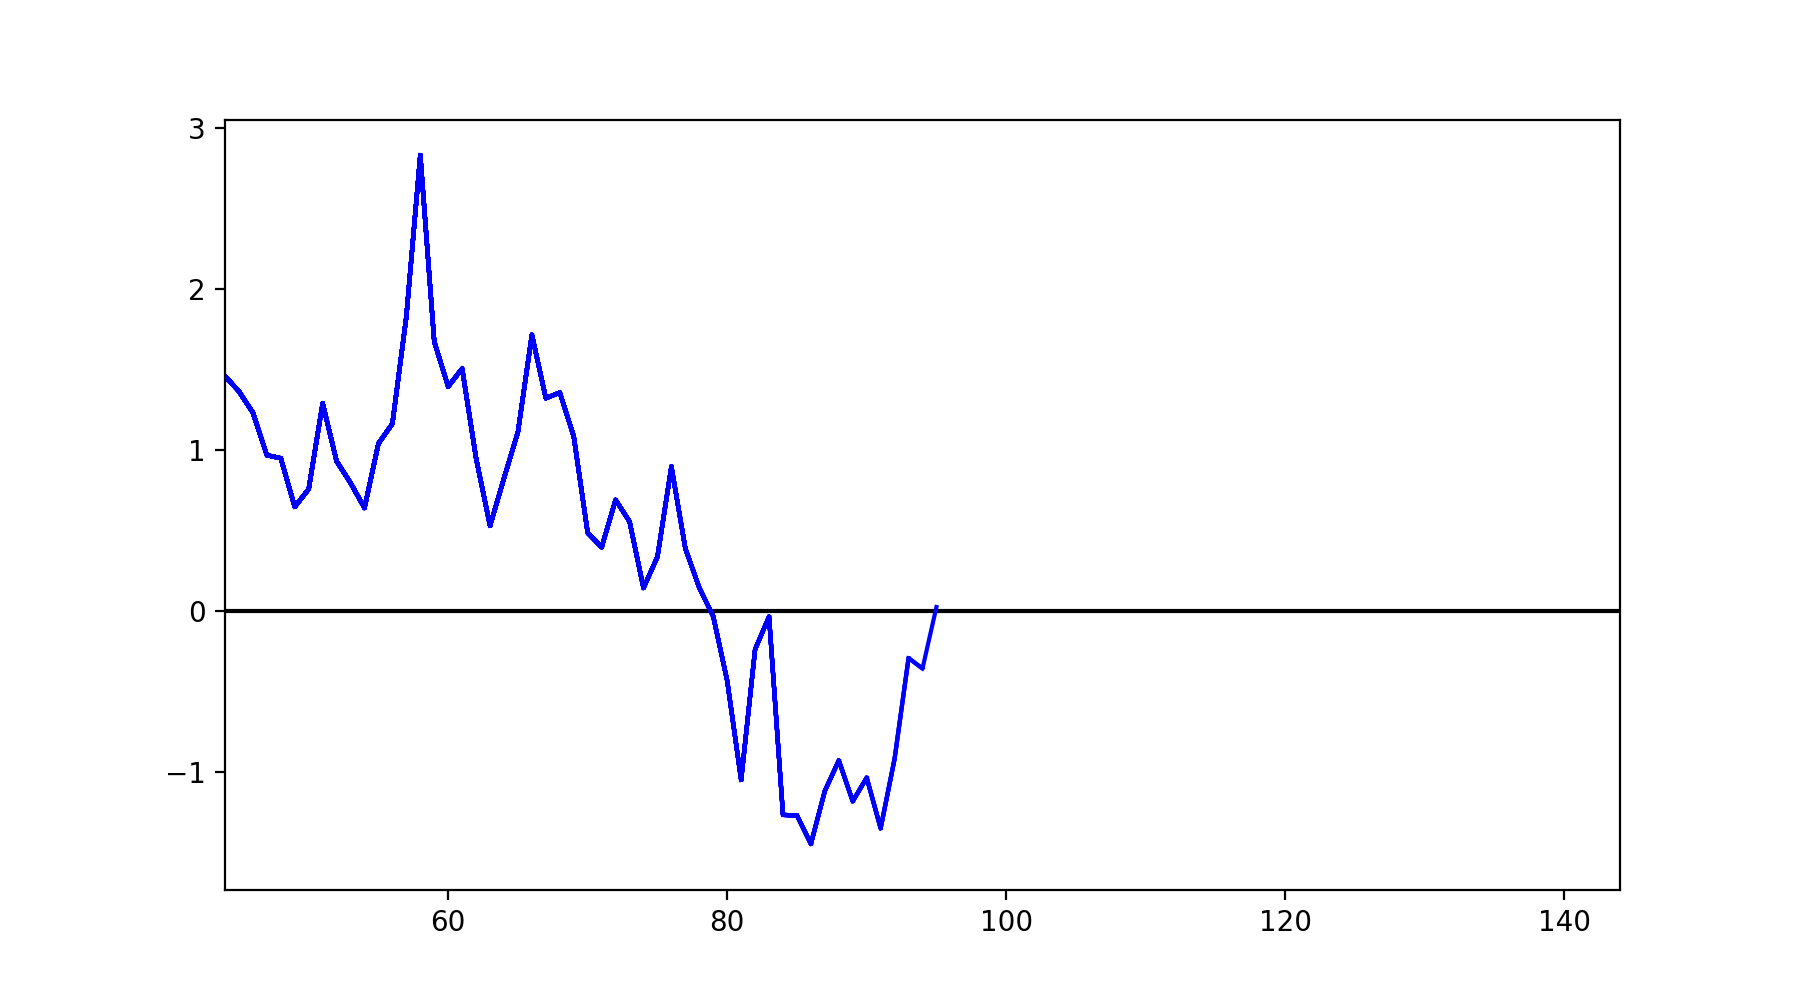

In [57]:
fig = plt.figure()
fig.set_size_inches(9, 5)
ax = fig.add_subplot(111)
plt.axhline(0, color='black');
fig.show()

In [ ]:
if __name__ == "__main__":
    scrape_yahoo(nq_s1,es_s2)
    

nan , 16/03/2023 22:19:51
-0.71 , 16/03/2023 22:24:54
-0.89 , 16/03/2023 22:29:56
-1.17 , 16/03/2023 22:34:59
-0.71 , 16/03/2023 22:40:01
0.19 , 16/03/2023 22:45:03
-0.06 , 16/03/2023 22:50:05
-1.51 , 16/03/2023 22:55:07
-0.83 , 16/03/2023 23:00:10
0.48 , 16/03/2023 23:05:12
-0.73 , 16/03/2023 23:10:14
0.05 , 16/03/2023 23:15:16
1.73 , 16/03/2023 23:20:18
0.93 , 16/03/2023 23:25:21
2.81 , 16/03/2023 23:30:23
2.59 , 16/03/2023 23:35:25
2.0 , 16/03/2023 23:40:28
1.9 , 16/03/2023 23:45:30
1.23 , 16/03/2023 23:50:32
0.95 , 16/03/2023 23:55:34
0.99 , 17/03/2023 00:00:37
0.64 , 17/03/2023 00:05:39
0.93 , 17/03/2023 00:10:41
0.9 , 17/03/2023 00:15:43
1.47 , 17/03/2023 00:20:47
1.96 , 17/03/2023 00:25:49
1.39 , 17/03/2023 00:30:51
2.59 , 17/03/2023 00:35:55
1.68 , 17/03/2023 00:40:57
1.67 , 17/03/2023 00:45:59
1.6 , 17/03/2023 00:51:02
1.75 , 17/03/2023 00:56:04
1.44 , 17/03/2023 01:01:06
1.38 , 17/03/2023 01:06:09
1.38 , 17/03/2023 01:11:10
1.77 , 17/03/2023 01:16:13
1.62 , 17/03/2023 01:21:1